In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_excel('/content/healthcare_dataset_case1.xlsx')

# Make a copy of the dataset to avoid overwriting the original
processed_data = data.copy()

# Handle datetime columns
if 'Date of Admission' in processed_data.columns:
    processed_data['Admission Year'] = pd.to_datetime(processed_data['Date of Admission']).dt.year
    processed_data['Admission Month'] = pd.to_datetime(processed_data['Date of Admission']).dt.month
    processed_data['Admission Day'] = pd.to_datetime(processed_data['Date of Admission']).dt.day
    processed_data = processed_data.drop(columns=['Date of Admission'])

if 'Discharge Date' in processed_data.columns:
    processed_data['Discharge Year'] = pd.to_datetime(processed_data['Discharge Date']).dt.year
    processed_data['Discharge Month'] = pd.to_datetime(processed_data['Discharge Date']).dt.month
    processed_data['Discharge Day'] = pd.to_datetime(processed_data['Discharge Date']).dt.day
    processed_data = processed_data.drop(columns=['Discharge Date'])

# Encode categorical columns
label_encoders = {}
for column in processed_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    processed_data[column] = le.fit_transform(processed_data[column].astype(str))
    label_encoders[column] = le

# Separate features (X) and target (y)
X = processed_data.drop(columns=['Test Results'])  # Replace 'Test Results' with the actual target column
y = processed_data['Test Results']

# Ensure all columns are numeric
assert X.select_dtypes(exclude=['int64', 'int32', 'float64']).empty, "Some columns are still non-numeric!"

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)


Model Accuracy: 0.4345945945945946
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.45      0.44      3754
           1       0.43      0.42      0.42      3617
           2       0.44      0.43      0.44      3729

    accuracy                           0.43     11100
   macro avg       0.43      0.43      0.43     11100
weighted avg       0.43      0.43      0.43     11100



In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\\n", feature_importances)


Feature Importances:\n Billing Amount        0.091441
Hospital              0.091116
Name                  0.090641
Doctor                0.090640
Room Number           0.086831
Age                   0.074889
Admission Day         0.067979
Discharge Day         0.067363
Blood Type            0.045597
Discharge Month       0.043419
Admission Month       0.043171
Medical Condition     0.040563
Medication            0.036020
Insurance Provider    0.035611
Discharge Year        0.028473
Admission Year        0.028093
Admission Type        0.024317
Gender                0.013836
dtype: float64


In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Updated Model Accuracy:", accuracy)
print("Updated Classification Report:\\n", report)


Updated Model Accuracy: 0.4345945945945946
Updated Classification Report:\n               precision    recall  f1-score   support

           0       0.43      0.45      0.44      3754
           1       0.43      0.42      0.42      3617
           2       0.44      0.43      0.44      3729

    accuracy                           0.43     11100
   macro avg       0.43      0.43      0.43     11100
weighted avg       0.43      0.43      0.43     11100



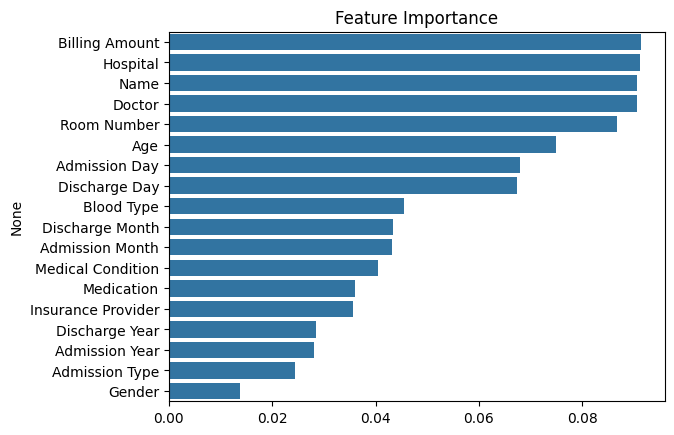

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance")
plt.show()


In [ ]:
import joblib
joblib.dump(model, "random_forest_healthcare.pkl")


['random_forest_healthcare.pkl']

In [ ]:
!pip install pandas-profiling


In [ ]:
!pip uninstall -y pandas-profiling numba


Found existing installation: pandas-profiling 3.2.0
Uninstalling pandas-profiling-3.2.0:
  Successfully uninstalled pandas-profiling-3.2.0
Found existing installation: numba 0.60.0
Uninstalling numba-0.60.0:
  Successfully uninstalled numba-0.60.0


In [ ]:
!pip install sweetviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 59.9 MB/s eta 0:00:00


In [ ]:
# Step 1: Load and Clean the Dataset
import pandas as pd

# Load the dataset from an Excel file (replace 'healthcare_dataset_case1.xlsx' with your actual file name or path)
data = pd.read_excel("healthcare_dataset_case1.xlsx")

# Example preprocessing: Drop rows with missing values (modify as per your requirements)
processed_data = data.dropna()

# Step 2: Install Sweetviz (if not installed)
!pip install sweetviz

# Step 3: Generate Sweetviz Report
import sweetviz as sv

# Analyze the processed dataset
report = sv.analyze(processed_data)

# Save the report as an HTML file
report.show_html("Sweetviz_Report.html")

# Step 4: Download the Report
from google.colab import files
files.download("Sweetviz_Report.html")


                                             |          | [  0%]   00:00 -> (? left)

Report Sweetviz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>